<a href="https://colab.research.google.com/github/yogeshtak/Machine_Learning/blob/master/deep_learning_clothing_dataset/deep_learning_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
#importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.4.1'

In [4]:
from tensorflow.keras.preprocessing.image import load_img

In [5]:
#change file path to your dataset
fullname = '/content/drive/MyDrive/DATASETS/clothing-dataset-small-master/validation/dress/07cddef1-1fc8-47e4-a28a-613e60912590.jpg'

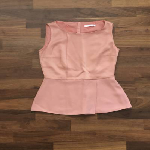

In [6]:
load_img(fullname, target_size=(150,150))

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
#file path to your dataset

train_gen = ImageDataGenerator()

train_ds = train_gen.flow_from_directory('/content/drive/MyDrive/DATASETS/clothing-dataset-small-master/train/',
                                         seed = 1,
                                         target_size = (150,150),
                                         batch_size=32)

Found 3068 images belonging to 10 classes.


In [9]:
X, y = next(train_ds)

In [10]:
X.shape

(32, 150, 150, 3)

32 is batch size, 150*150 is dimension and 3 for RGB color

In [11]:
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 

In [12]:
#we are using pretrained model from Keras, it is called Xception
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

In [13]:
#file path to your dataset

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory('/content/drive/MyDrive/DATASETS/clothing-dataset-small-master/train/',
                                         seed = 1,
                                         target_size = (150,150),
                                         batch_size=32)

Found 3068 images belonging to 10 classes.


In [14]:
#file path to your dataset

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory('/content/drive/MyDrive/DATASETS/clothing-dataset-small-master/validation/',
                                         seed = 1,
                                         target_size = (150,150),
                                         batch_size=32)

Found 341 images belonging to 10 classes.


## Transfer Learning

Now we'll do **Trasnfer Learning** - we take a pretrained model and train our data on top of it and imporve it

So, we keep the old convolutional layers, but train new dense layers on top of that

In [25]:
base_model = Xception(
    weights = 'imagenet',
    input_shape = (299,299,3),
    include_top = False
)

base_model.trainable = False

In [26]:
inputs = keras.Input(shape=(299,299,3))

base = base_model(inputs, training= False)
vector = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vector) # because we have 10 classes

model = keras.Model(inputs, outputs)

In [17]:
lr = 0.01     #learning rate

model.compile(
    optimizer = keras.optimizers.Adam(lr),
    loss = keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [18]:
history = model.fit(train_ds, epochs=5, validation_data= val_ds)

Epoch 1/5
96/96 [==============================] - 799s 8s/step - loss: 1.8633 - accuracy: 0.5431 - val_loss: 0.8440 - val_accuracy: 0.7742
Epoch 2/5
96/96 [==============================] - 304s 3s/step - loss: 0.5415 - accuracy: 0.8328 - val_loss: 0.8804 - val_accuracy: 0.7947
Epoch 3/5
96/96 [==============================] - 299s 3s/step - loss: 0.3529 - accuracy: 0.8838 - val_loss: 0.7875 - val_accuracy: 0.7801
Epoch 4/5
96/96 [==============================] - 302s 3s/step - loss: 0.2118 - accuracy: 0.9266 - val_loss: 0.7479 - val_accuracy: 0.7977
Epoch 5/5
96/96 [==============================] - 301s 3s/step - loss: 0.1396 - accuracy: 0.9519 - val_loss: 0.7884 - val_accuracy: 0.8094


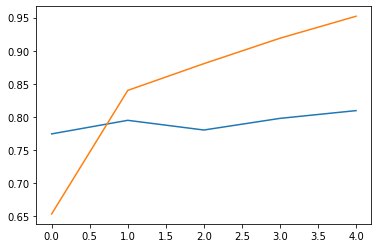

In [19]:
plt.figure(figsize=(6,4))

plt.plot(history.epoch, history.history['val_accuracy'])
plt.plot(history.epoch, history.history['accuracy'])

In [24]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 10,
    zoom_range = 0.1,
    horizontal_flip = True,
)


train_ds = train_gen.flow_from_directory('/content/drive/MyDrive/DATASETS/clothing-dataset-small-master/train/',
                                         seed = 1,
                                         target_size = (299,299),
                                         batch_size=32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory('/content/drive/MyDrive/DATASETS/clothing-dataset-small-master/validation/',
                                         seed = 1,
                                         target_size = (299,299),
                                         batch_size=32)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [30]:
inputs = keras.Input(shape=(299,299,3))

base = base_model(inputs, training= False)
vector = keras.layers.GlobalAveragePooling2D()(base)

inner = keras.layers.Dense(100,activation='relu')(vector)
dropout = keras.layers.Dropout(0.5)(inner)
outputs = keras.layers.Dense(10)(dropout) # because we have 10 classes

model = keras.Model(inputs, outputs)

lr = 0.001     #learning rate

model.compile(
    optimizer = keras.optimizers.Adam(lr),
    loss = keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [31]:
callbacks = [
             keras.callbacks.ModelCheckpoint(
                 'xception2_{epoch:02d}_{val_accuracy:3f}.hs',
                 monitor = 'val_accuracy',
                 save_best_only=True,
                 mode='max'
             )
]

In [ ]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds, callbacks=callbacks)

Epoch 1/5
96/96 [==============================] - 1311s 14s/step - loss: 1.3519 - accuracy: 0.5792 - val_loss: 0.5439 - val_accuracy: 0.8240
INFO:tensorflow:Assets written to: xception2_01_0.824047.hs/assets
Epoch 2/5
96/96 [==============================] - 1327s 14s/step - loss: 0.6216 - accuracy: 0.7910 - val_loss: 0.4736 - val_accuracy: 0.8387
INFO:tensorflow:Assets written to: xception2_02_0.838710.hs/assets
Epoch 3/5
61/96 [==================>...........] - ETA: 7:20 - loss: 0.4943 - accuracy: 0.8359